<a href="https://colab.research.google.com/github/duTianze/machine-learning/blob/master/keras/s1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

summary in keras lerning

# **评估**

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 自动 0.2评估
model.fit(x=x, y=Y, epochs=150, batch_size=10, validation_split=0.2)

# 手动
model.fit(x_train, Y_train, validation_data=(x_validation, Y_validation), epochs=150, batch_size=10)

# k fold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
for train, validation in kfold.split(x, Y):
    # 创建模型
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # 编译模型
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # 训练模型
    model.fit(x[train], Y[train], epochs=150, batch_size=10, verbose=0)

    # 评估模型
    scores = model.evaluate(x[validation], Y[validation], verbose=0)

    # 输出评估结果
    print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))
    cvscores.append(scores[1] * 100)

# **使用scikit**


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)

# 10折交叉验证
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, x, Y, cv=kfold)
print(results.mean())


# GridSearchCV

# 构建需要调参的参数
param_grid = {}
param_grid['optimizer'] = ['rmsprop', 'adam']
param_grid['init'] = ['glorot_uniform', 'normal', 'uniform']
param_grid['epochs'] = [50, 100, 150, 200]
param_grid['batch_size'] = [5, 10, 20]

# 调参
grid = GridSearchCV(estimator=model, param_grid=param_grid)
results = grid.fit(x, Y)

# 输出结果
print('Best: %f using %s' % (results.best_score_, results.best_params_))
means = results.cv_results_['mean_test_score']
stds = results.cv_results_['std_test_score']
params = results.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

# **demo**

In [1]:
from sklearn import datasets
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# 导入数据
dataset = datasets.load_iris()

x = dataset.data
Y = dataset.target

# 设定随机种子
seed = 7
np.random.seed(seed)

# 构建模型函数
def create_model(optimizer='adam', init='glorot_uniform'):
    # 构建模型
    model = Sequential()
    model.add(Dense(units=4, activation='relu', input_dim=4, kernel_initializer=init))
    model.add(Dense(units=6, activation='relu', kernel_initializer=init))
    model.add(Dense(units=3, activation='softmax', kernel_initializer=init))

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

model = KerasClassifier(build_fn=create_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, x, Y, cv=kfold)
print('Accuracy: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Using TensorFlow backend.


Accuracy: 93.33% (0.10)


# **保存模型**

In [0]:
# 模型保存成Json文件
model_json = model.to_json()
with open('model.json', 'w') as file:
    file.write(model_json)

# 保存模型的权重值
model.save_weights('model.json.h5')


# 从Json加载模型
with open('model.json', 'r') as file:
    model_json = file.read()
new_model = model_from_json(model_json)
new_model.load_weights('model.json.h5')
# 加载权重
new_model = model_from_json(model_json)
new_model.load_weights('model.json.h5')
# 编译模型
new_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']

                  
# 设置检查点
filepath = 'weights.best.h5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]
model.fit(x, Y_labels, validation_split=0.2, epochs=200, batch_size=5, verbose=0, callbacks=callback_list)


# train history

acc: 92.67%
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


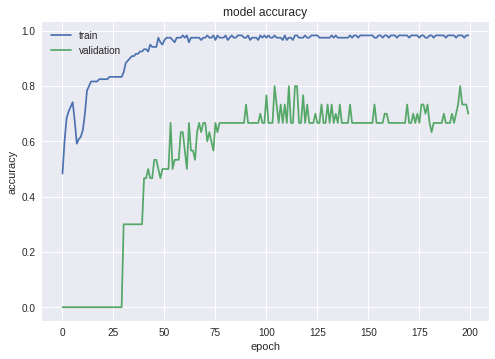

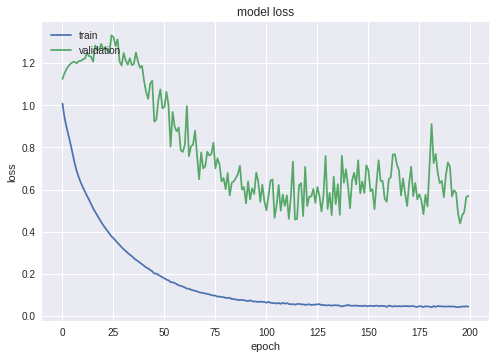

In [2]:
from sklearn import datasets
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt


# 导入数据
dataset = datasets.load_iris()

x = dataset.data
Y = dataset.target

# Convert labels to categorical one-hot encoding
Y_labels = to_categorical(Y, num_classes=3)

# 设定随机种子
seed = 7
np.random.seed(seed)
# 构建模型函数
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # 构建模型
    model = Sequential()
    model.add(Dense(units=4, activation='relu', input_dim=4, kernel_initializer=init))
    model.add(Dense(units=6, activation='relu', kernel_initializer=init))
    model.add(Dense(units=3, activation='softmax', kernel_initializer=init))

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# 构建模型
model = create_model()

history = model.fit(x, Y_labels, validation_split=0.2, epochs=200, batch_size=5, verbose=0)

# 评估模型
scores = model.evaluate(x, Y_labels, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

# Hisotry列表
print(history.history.keys())

# accuracy的历史
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# loss的历史
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# 手写数字识别


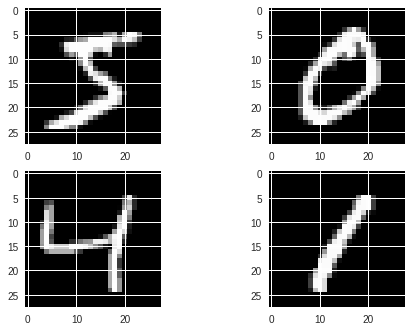

In [3]:
from keras.datasets import mnist
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import  Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend
backend.set_image_data_format('channels_first')
from matplotlib import pyplot as plt

# 从Keras导入Mnist数据集
(X_train, y_train), (X_validation, y_validation) = mnist.load_data()

# 显示4张手写数字的图片
plt.subplot(221)
plt.imshow(X_train[0], cmap='gray')

plt.subplot(222)
plt.imshow(X_train[1], cmap='gray')

plt.subplot(223)
plt.imshow(X_train[2], cmap='gray')

plt.subplot(224)
plt.imshow(X_train[3], cmap='gray')

plt.show()

In [4]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 1, 28, 28).astype('float32')

# 格式化数据到0-1之前
X_train = X_train / 255
X_validation = X_validation / 255

# one-hot编码
y_train = np_utils.to_categorical(y_train)
y_validation = np_utils.to_categorical(y_validation)

# 创建模型
def create_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    # 编译模型
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2)

score = model.evaluate(X_validation, y_validation, verbose=0)
print('CNN_Large: %.2f%%' % (score[1] * 100))

Epoch 1/10
 - 6s - loss: 0.3903 - acc: 0.8804
Epoch 2/10
 - 3s - loss: 0.0891 - acc: 0.9734
Epoch 3/10
 - 3s - loss: 0.0676 - acc: 0.9793
Epoch 4/10
 - 3s - loss: 0.0552 - acc: 0.9831
Epoch 5/10
 - 3s - loss: 0.0468 - acc: 0.9850
Epoch 6/10
 - 3s - loss: 0.0433 - acc: 0.9866
Epoch 7/10
 - 3s - loss: 0.0383 - acc: 0.9876
Epoch 8/10
 - 3s - loss: 0.0327 - acc: 0.9896
Epoch 9/10
 - 3s - loss: 0.0323 - acc: 0.9897
Epoch 10/10
 - 3s - loss: 0.0300 - acc: 0.9903
CNN_Large: 99.21%


# 图像增强

## show image

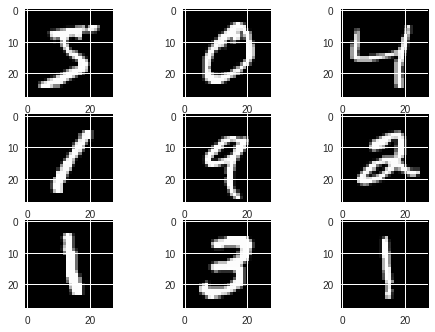

In [5]:
from keras.datasets import mnist
from matplotlib import pyplot as plt

# 从Keras导入Mnist数据集
(X_train, y_train), (X_validation, y_validation) = mnist.load_data()

# 显示9张手写数字的图片
for i in range(0, 9):
    plt.subplot(331 + i)
    plt.imshow(X_train[i], cmap='gray')

plt.show()

## 图像特征化

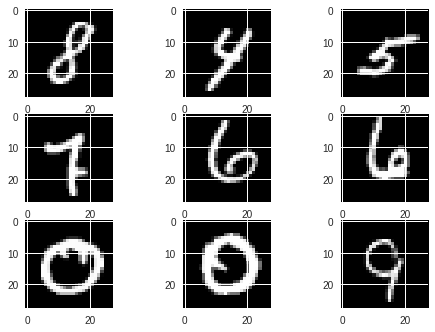

In [7]:
from keras.preprocessing.image import ImageDataGenerator

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 1, 28, 28).astype('float32')

# 图像特征化
imgGen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
imgGen.fit(X_train)

for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

## ZCA白化

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


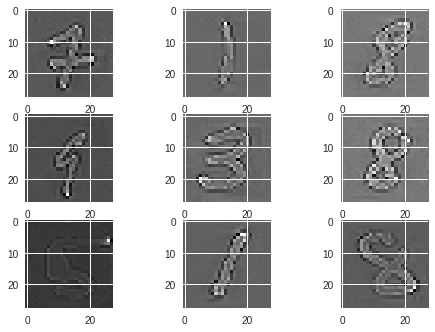

In [8]:
# 导入数据
(X_train, y_train), (X_validation, y_validation) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 1, 28, 28).astype('float32')

# ZCA白化
imgGen = ImageDataGenerator(zca_whitening=True)
imgGen.fit(X_train)

for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

## 随机处理

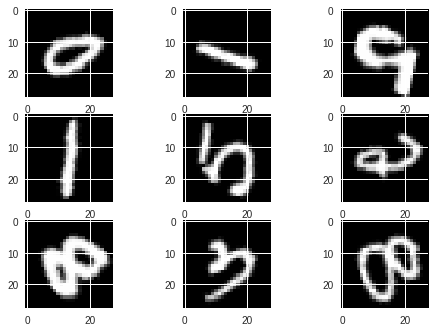

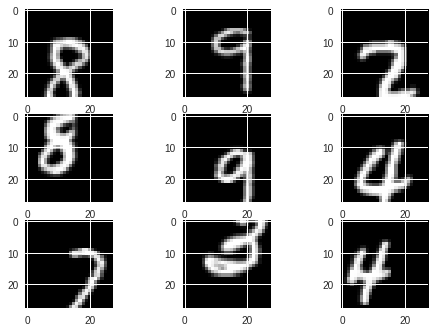

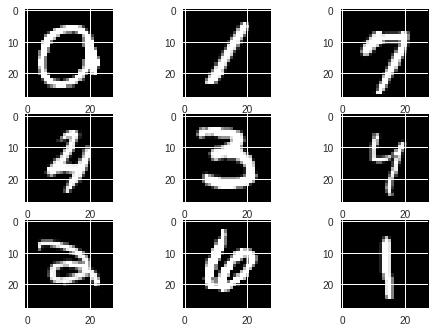

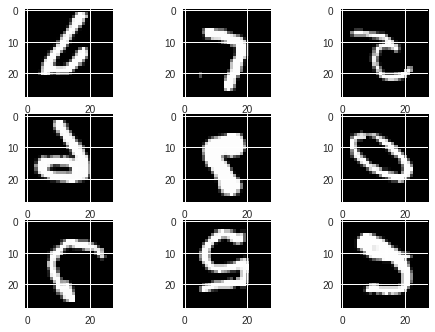

In [9]:
# 导入数据
(X_train, y_train), (X_validation, y_validation) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_validation = X_validation.reshape(X_validation.shape[0], 1, 28, 28).astype('float32')

# 图像旋转
imgGen = ImageDataGenerator(rotation_range=90)
imgGen.fit(X_train)

for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

# 图像移动
imgGen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
imgGen.fit(X_train)

for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

# 图像剪切
imgGen = ImageDataGenerator(shear_range=0.2)
imgGen.fit(X_train)

for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

# 图像剪切
imgGen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
imgGen.fit(X_train)

for X_batch, y_batch in imgGen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break